In [1]:
import spacedecomp
from spacedecomp import Factorization
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
training_data = datasets.MNIST(
    root="../datasets/",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)
training_dataloader = DataLoader(training_data, batch_size=4096)

In [3]:
x_train, y_train = next(iter(training_dataloader))

In [4]:
Y = (x_train).reshape(x_train.shape[0], -1)*255
Y = Y.type(torch.IntTensor)
Y = Y.T

In [5]:
model = Factorization(Y.detach().numpy(), laten_dim=10, train_loadings=True, type='NSF')

In [72]:
history = model.train(Y, lr=1e-4, epochs=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

Finished training


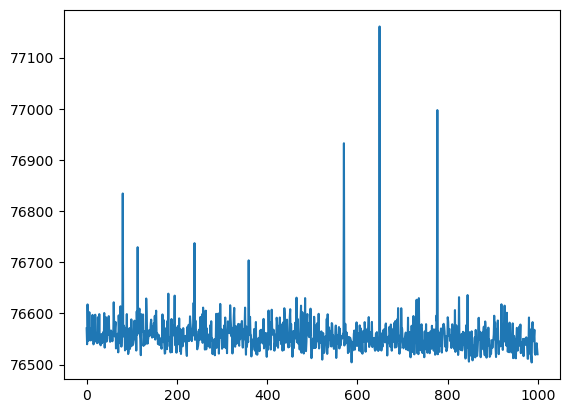

In [76]:
plt.plot(history)

In [77]:
F = model.q_f.sample()

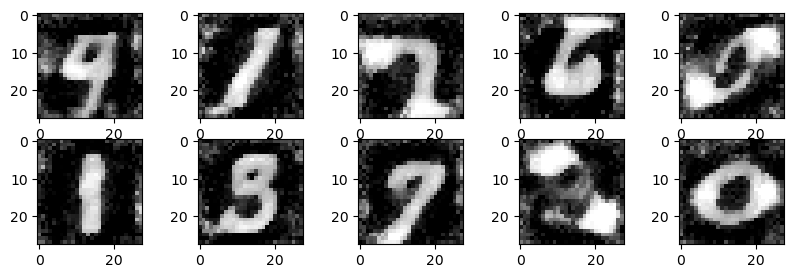

In [81]:
plt.figure(figsize=(10, 3))
for l in range(model.L):
    plt.subplot(2, 5, l+1)
    factor = F[:, l].detach().cpu().numpy()
    plt.imshow(factor.reshape(28, 28), vmin=-5, vmax=5, cmap='gray')#, vmin=-0.2, vmax=0.2, cmap='bwr')